# Image Processing and Computer Vision

## Instruction
In this practical, student is required to perform the following image processing and computer vision
functions. Image and video data will be provided for the purposes.<br><br>
__(A) Image processing:__ <br>
    1) Read image<br>
    2) Resize image<br>
    3) Convert to grayscale image<br>
    4) Convert to binary image<br>
    5) Morphological operation<br>
    6) Image denoise<br>
    7) Edge detection<br>
    8) Corner detection<br>
    9) Image segmentation (manual): RGB range<br>
    10) Image segmentation (auto): K-means<br>
    11) Object detection using Haar Cascades<br>
    12) Face detection using Haar Cascade (image)<br>
    
__(B) Computer Vision:__ <br>
    1) HaarCascadeClassifier<br>
    2) Object Tracking<br>
    3) Motion Detection<br>
    4) Object Detection



# Section A: Image Processing

Import necessary libraries. “cv2” is a well-known library (OpenCV) to perform image processing and video analysis.

In [2]:
pip install opencv-python    

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/a4/7d/f1c30a92854540bf789e9cd5dde7ef49bbe63f855b85a2e6b3db8135c591/opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.2/39.5 MB 5.9 MB/s eta 0:00:07
    --------------------------------------- 0.8/39.5 MB 9.6 MB/s eta 0:00:05
   - -------------------------------------- 1.3/39.5 MB 10.5 MB/s eta 0:00:04
   - -------------------------------------- 1.9/39.5 MB 10.8 MB/s eta 0:00:04
   -- ------------------------------------- 2.4/39.5 MB 11.1 MB/s eta 0:00:04
   -- ------------------------------------- 2.9/39.5 MB 11.1 MB/s eta 0:00:04
   --- ------------------------------------ 3.3/39.5 MB 10.7 MB/s eta 0:00:04
   --- ------------------------------------ 3.7/39.5 MB 10.4 MB/s eta 0:00:04
   ---- ----------------------------------- 4.2/39.5 MB 10.4 MB/s eta 0:00:04
   ---- 

In [1]:
import cv2                       # process image
import numpy as np               # process table (matrix)
import matplotlib.pyplot as plt  # generate graph

## (1) Read Image
“imread” is used to read an image in Python while “imshow” can be used to visualize an
image output. The following lines read “Lenna.png” and visualize it in python.

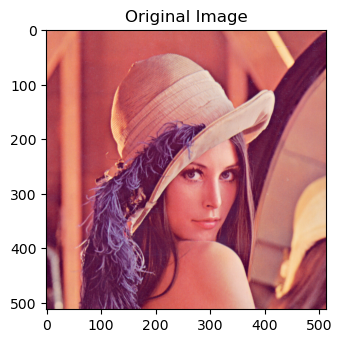

In [2]:
img = cv2.imread('Lenna.png') #complete this
#cv2.imshow('picOriLenna',img) #show img in external window
#cv2.waitKey(0)
#cv2.destroyAllWindows()

#OR
import matplotlib.pyplot as plt #generate img in a plot to show in notebook
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on') # get pixel value
plt.tight_layout()
plt.show()#Try to load your selfie or group photo

It is important that in Python we need to hold the visualization by using “cv2.waitKey(0)”
until the user press any key for further processing. User may close all windows to release the
memory by using “cv2.destroyAllWindows()”.

## (2) Resize Image
An image can be resized with the “resize” function. “fx” and “fy” indicate the scale that the
image to be resized (Example: 0.5 means to downsize the image into ½ of the original size).

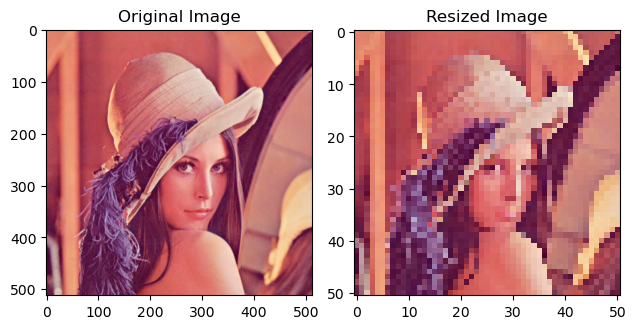

In [3]:
## Load the image
img = cv2.imread('Lenna.png') #complete this
#cv2.imshow('img',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

## Resize the image
imgResize = cv2.resize(img,None,fx=0.1, fy=0.1) #complete this
#cv2.imshow('picResized',imgResize)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

#OR
# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

# Display the resized image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imgResize, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.axis('on')

plt.tight_layout()
plt.show()

## (3) Convert to Grayscale
An image can be converted to grayscale from color image with the following lines.

In [4]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #take time to process RGB information (reduce information)
cv2.imshow('picGray',gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## (4) Convert to Binary
You can convert the image into binary image by setting the threshold value

In [5]:
# Set the threshold value
threshold_value = 127 #take the mid point value of 0-255 (>127 white, <127 black)

# Apply thresholding to convert to binary image
_, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY) #try cv.2THRESH_BINARY_INV, cv2.THRESH_OHSU

# Display the binary image
cv2.imshow('Binary Image', binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#OR
# # Display the original image
# plt.subplot(1, 2, 1)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.title('Original Image')
# plt.axis('off')

# # Display the resized image
# plt.subplot(1, 2, 2)
# plt.imshow(cv2.cvtColor(binary_image, cv2.THRESH_BINARY))
# plt.title('Binary_image')
# plt.axis('off')

# plt.tight_layout()
# plt.show()

## (5) Morphological Operation

Images may contain numerous imperfections. In particular, the binary regions produced by
simple thresholding are distorted by noise and texture (example, gaps between the pixels).
Morphological image processing pursues the goals of removing these imperfections by
accounting for the form and structure of the image. Morphological operators often take a
binary image and a structuring element as input and combine them using a set operator
(intersection, union, inclusion, complement). They process objects in the input image based
on characteristics of its shape, which are encoded in the structuring element. There are four
common types of morphological operations which are; erosion, dilation, opening and closing.
Following lines perform morphological operation with a Digit image.

In [6]:
# We use Digit image to perform morphological operation
imgDigit = cv2.imread('Digit3.png') #complete this
cv2.imshow('picOriDigit',imgDigit )   #complete this

# Erosion
kernel = np.ones((3,3),np.uint8) #complete this
erosion = cv2.erode(imgDigit,kernel,iterations = 1)
cv2.imshow('picErosion',erosion)

# Dilation
kernel = np.ones((31,31),np.uint8) #bigger num, the effect getting stronger
dilation = cv2.dilate(imgDigit,kernel,iterations = 1)
cv2.imshow('picDilation',dilation)

## Opening - 2 step processes: erode > dilation
#kernel = np.ones((,),np.uint8) #complete this
#opening = cv2.morphologyEx(imgDigit, cv2.MORPH_OPEN, kernel)
#cv2.imshow('picOpening',opening)

## Closing - 2 step processes: dilation > erode
#kernel = np.ones(,),np.uint8) #complete this
#closing = cv2.morphologyEx(imgDigit, cv2.MORPH_CLOSE, kernel)
#cv2.imshow('picClosing',closing)

cv2.waitKey(0) # to show img
cv2.destroyAllWindows()

You can also replace the imshow by pyplot function

In [ ]:
# Load the digit image
imgDigit = cv2.imread('Digit3.png')

# # Create a subplot grid for displaying images
plt.figure(figsize=(15, 10))

# Original Digit Image
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(imgDigit, cv2.COLOR_BGR2RGB))
plt.title('Original Digit Image')
plt.axis('off')

# Erosion
kernel = np.ones((, ), np.uint8) #complete this
erosion = cv2.erode(imgDigit, kernel, iterations=1)

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB))
plt.title('Erosion')
plt.axis('off')

# Dilation
kernel = np.ones((, ), np.uint8) #complete this
dilation = cv2.dilate(imgDigit, kernel, iterations=1)

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB))
plt.title('Dilation')
plt.axis('off')

# Opening
kernel = np.ones((, ), np.uint8) #complete this
opening = cv2.morphologyEx(imgDigit, cv2.MORPH_OPEN, kernel)

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
plt.title('Opening')
plt.axis('off')

# Closing
kernel = np.ones((, ), np.uint8) #complete this
closing = cv2.morphologyEx(imgDigit, cv2.MORPH_CLOSE, kernel)

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(closing, cv2.COLOR_BGR2RGB))
plt.title('Closing')
plt.axis('off')

plt.tight_layout()
plt.show()

## (6) Image Denoising or Image Filtering
Image noise is random (not present in the object imaged) variation of brightness or color
information in images. It is an unwanted signal that could be an obstacle in the later
processes (e.g feature extraction) and it might affect the overall system performance. Thus,
it is important to have noise removal in the image preprocessing step. Following lines
demonstrates noise removal by using three different filters (Average, Gaussian, and Median)
on camera man image with salt and pepper noise.

References:<br>
https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html<br>
https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html

In [9]:
#Read and convert image into grayscale
imgNoise = cv2.imread("cameraman_noise.jpg") #complete this
gray_imgNoise = cv2.cvtColor(imgNoise, cv2.COLOR_BGR2GRAY)#complete this
cv2.imshow('picOriNoise',gray_imgNoise)

# Averaging filtering
blurAverage = cv2.blur(gray_imgNoise,(31,31)) #complete this
cv2.imshow('picBlur', blurAverage)

# Gaussian filtering
blurGauss = cv2.GaussianBlur(gray_imgNoise,(31,31),0) ##complete this
cv2.imshow('picBlurGauss',blurGauss)

# Median filtering
blurMedian = cv2.medianBlur(gray_imgNoise,31)   #complete this
cv2.imshow('picBlurMedian',blurMedian)

cv2.waitKey(0)
cv2.destroyAllWindows()

You can also replace the imshow by pyplot function

In [ ]:
# Load the noisy image
imgNoise = cv2.imread("cameraman_noise.jpg")
gray_imgNoise = cv2.cvtColor(imgNoise, cv2.COLOR_BGR2GRAY)

# Create a subplot grid for displaying images
plt.figure(figsize=(10, 5))

# Original Noisy Image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(gray_imgNoise, cv2.COLOR_BGR2RGB))
plt.title('Original Noisy Image')
plt.axis('off')

# Averaging filtering
blurAverage = cv2.blur(gray_imgNoise, (, )) #complete this

plt.subplot(2, 2, 2)
plt.imshow(blurAverage, cmap='gray')
plt.title('Averaging Filtering')
plt.axis('off')

# Gaussian filtering
blurGauss = cv2.GaussianBlur(gray_imgNoise, (, ), 0) #complete this

plt.subplot(2, 2, 3)
plt.imshow(blurGauss, cmap='gray')
plt.title('Gaussian Filtering')
plt.axis('off')

# Median filtering
blurMedian = cv2.medianBlur(gray_imgNoise, )

plt.subplot(2, 2, 4)
plt.imshow(blurMedian, cmap='gray')
plt.title('Median Filtering')
plt.axis('off')

plt.tight_layout()
plt.show()

#### Try yourself: Download an image from Google that contains noise and load it into the notebook. Then, utilize a denoising method from the previous section to effectively remove the noise from the image.

In [ ]:
# Load the noisy image
imgNoise = cv2.imread("")  #complete this

# Apply Gaussian Blur to the entire image
gaussian_filtered = cv2.GaussianBlur(imgNoise, (, ), 0) #complete this

# Apply Average Blur to the entire image
average_blurred = cv2.blur(imgNoise, (, )) #complete this

# Apply Median Blur to the entire image
median_blurred = cv2.medianBlur(imgNoise, ) #complete this

# Create a subplot grid for displaying images
plt.figure(figsize=(10, 10))

# Original Noisy Image
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(imgNoise, cv2.COLOR_BGR2RGB))
plt.title('Original Noisy Image')
plt.axis('off')

# Display Gaussian Blurred Image
plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(gaussian_filtered, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Blurred')
plt.axis('off')

# Display Average Blurred Image
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(average_blurred, cv2.COLOR_BGR2RGB))
plt.title('Average Blurred')
plt.axis('off')

# Display Median Blurred Image
plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(median_blurred, cv2.COLOR_BGR2RGB))
plt.title('Median Blurred')
plt.axis('off')

plt.tight_layout()
plt.show()

### Improve the code above by using regional filtering (Press 'q' to exit the window), utilise pimple_resized.png as image source

In [12]:
# Global variables to track mouse events
drawing = False
ix, iy = -1, -1

# Mouse callback function
def draw_rectangle(event, x, y, flags, param):
    global ix, iy, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            temp_img[:] = img.copy()
            cv2.rectangle(temp_img, (ix, iy), (x, y), (0, 255, 0), 2)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.rectangle(temp_img, (ix, iy), (x, y), (0, 255, 0), 2)
        apply_median_blur(iy, y, ix, x)  # Apply the median blur filter to the selected region

def apply_median_blur(y1, y2, x1, x2):
    # Ensure selected region is within image boundaries
    y1 = max(0, y1)
    y2 = min(temp_img.shape[0], y2)
    x1 = max(0, x1)
    x2 = min(temp_img.shape[1], x2)

    if y1 >= y2 or x1 >= x2:
        return

    # Apply median blur filter to the provided ROI
    roi = temp_img[y1:y2, x1:x2]
    filtered_roi = cv2.medianBlur(roi, 31)  # You can adjust the kernel size (e.g., 3, 5, 7, etc.)
    temp_img[y1:y2, x1:x2] = filtered_roi

# Load the image
img = cv2.imread('Bolt.jpg')        # put img to thye same file (press Q to exit)

temp_img = img.copy()

# Create a window and set the mouse callback function
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', draw_rectangle)

while True:
    cv2.imshow('Image', temp_img)

    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    elif key == ord('r'):
        temp_img = img.copy()

cv2.destroyAllWindows()

## (7) Edge Detection
Edge and corner are very useful image features commonly used for feature extraction and
perform recognition in an image. Following lines used canny operator to extract the edge
and Harris corner detector (next session) to extract the corner of the Chessboard image.

In [23]:
filename = 'Bolt.jpg' 
img = cv2.imread(filename)
img = cv2.resize(img,None,fx=0.5, fy=0.5)
cv2.imshow('picOriChessboard',img)

# Edge detection using canny operator
edgesCanny = cv2.Canny(img,100,200)  #complete this
cv2.imshow('picEdgeCanny',edgesCanny)

cv2.waitKey(0)
cv2.destroyAllWindows()

## (8) Corner Detection

In [24]:
filename = 'Bolt.jpg'   
img = cv2.imread(filename)
img = cv2.resize(img,None,fx=0.5, fy=0.5)
cv2.imshow('picOriChessboard',img)

# Corner detection using Harris corner detector
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)          
dst = cv2.dilate(dst,None)
img[dst>0.01*dst.max()]=[0,0,255]
cv2.imshow('picCornerHarris', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## (9) Image Segmentation (manual): RGB range
1. Segment different elements from the map images (“map.png”) and visualize it in different
windows such as lake, road, field, and housing area. Hint: you may refer to the following
steps and distinguish each of them by using different range of RGB values.<br>
a. Read “map.png” in python.<br>
b. Insert the following code to extract the river. Understand the code and repeat the
same process to extract road, field and housing area.

image segmentation based on the color

![](https://oi163.photobucket.com/albums/t281/kyin_album/map.jpg)

Hint: You may check the RGB values for the map using the following website:
http://imagecolorpicker.com/

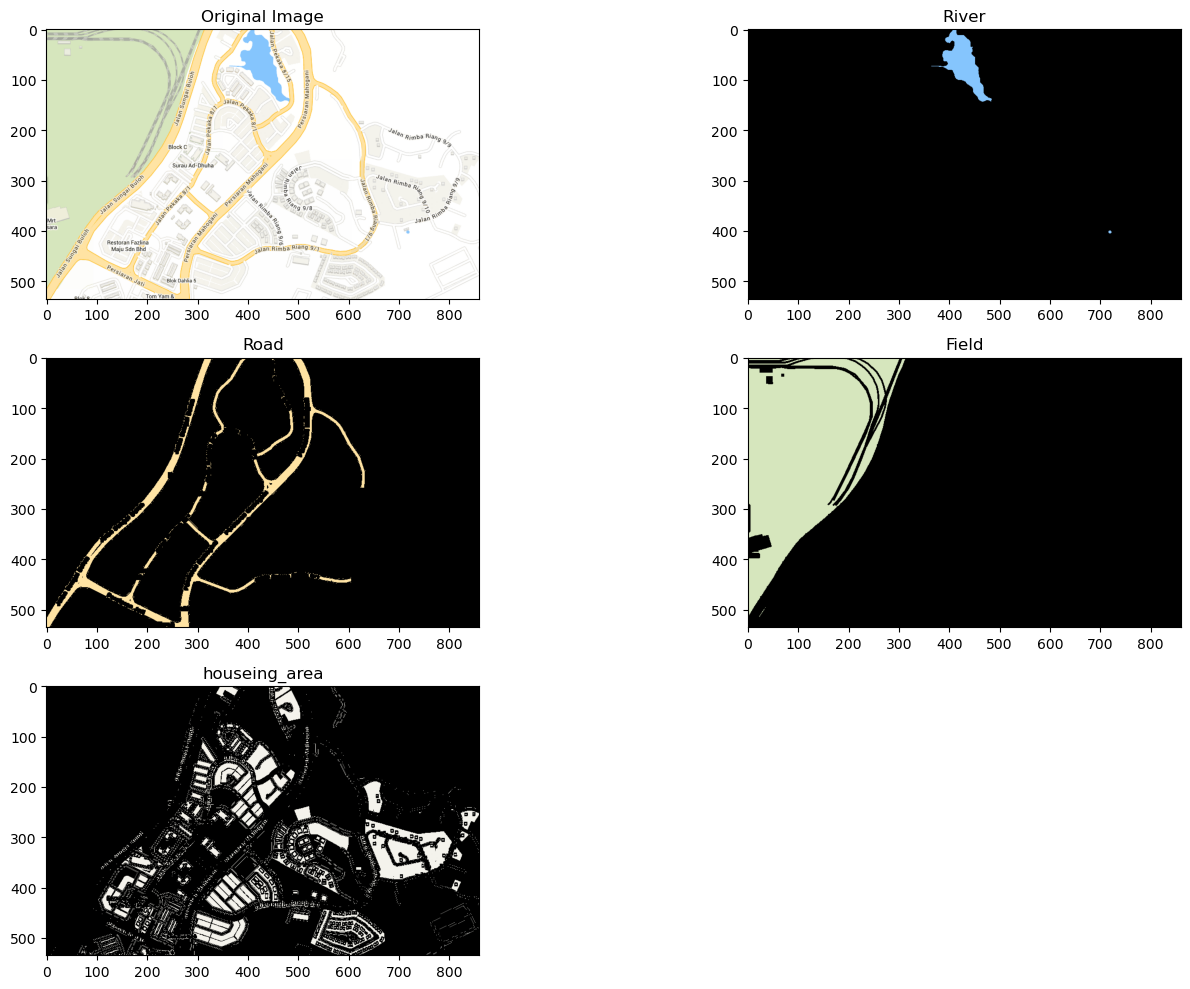

In [27]:
# Load the image
img = cv2.imread('map.png')      #complete this

# Create a subplot grid for displaying images
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(3, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('on')

# Extract the river
lower_river = np.array([248,192,128])       #complete this
upper_river = np.array([258,202,138])       #complete this
mask_river = cv2.inRange(img, lower_river, upper_river)
river = cv2.bitwise_and(img, img, mask=mask_river) # scanning

plt.subplot(3, 2, 2)
plt.imshow(cv2.cvtColor(river, cv2.COLOR_BGR2RGB))
plt.title('River')
plt.axis('on')

# Extract the road
lower_road = np.array([157,222,250])  #complete this
upper_road = np.array([167,232,260])  #complete this
mask_road = cv2.inRange(img, lower_road, upper_road)
road = cv2.bitwise_and(img, img, mask=mask_road)

plt.subplot(3, 2, 3)
plt.imshow(cv2.cvtColor(road, cv2.COLOR_BGR2RGB))
plt.title('Road')
plt.axis('on')

# Extract the field
lower_field = np.array([184,225,209])  #complete this
upper_field = np.array([194,235,219])  #complete this
mask_field = cv2.inRange(img, lower_field, upper_field)
field = cv2.bitwise_and(img, img, mask=mask_field)

plt.subplot(3, 2, 4)
plt.imshow(cv2.cvtColor(field, cv2.COLOR_BGR2RGB))
plt.title('Field')
plt.axis('on')

# Extract the houseing_area
lower_field = np.array([231,238,240])  #complete this
upper_field = np.array([241,248,250])  #complete this
mask_field = cv2.inRange(img, lower_field, upper_field)
houseing_area = cv2.bitwise_and(img, img, mask=mask_field)

plt.subplot(3, 2, 5)
plt.imshow(cv2.cvtColor(houseing_area, cv2.COLOR_BGR2RGB))
plt.title('houseing_area')
plt.axis('on')

plt.tight_layout()
plt.show()

## (10) Image Segmentation (Auto): K-means

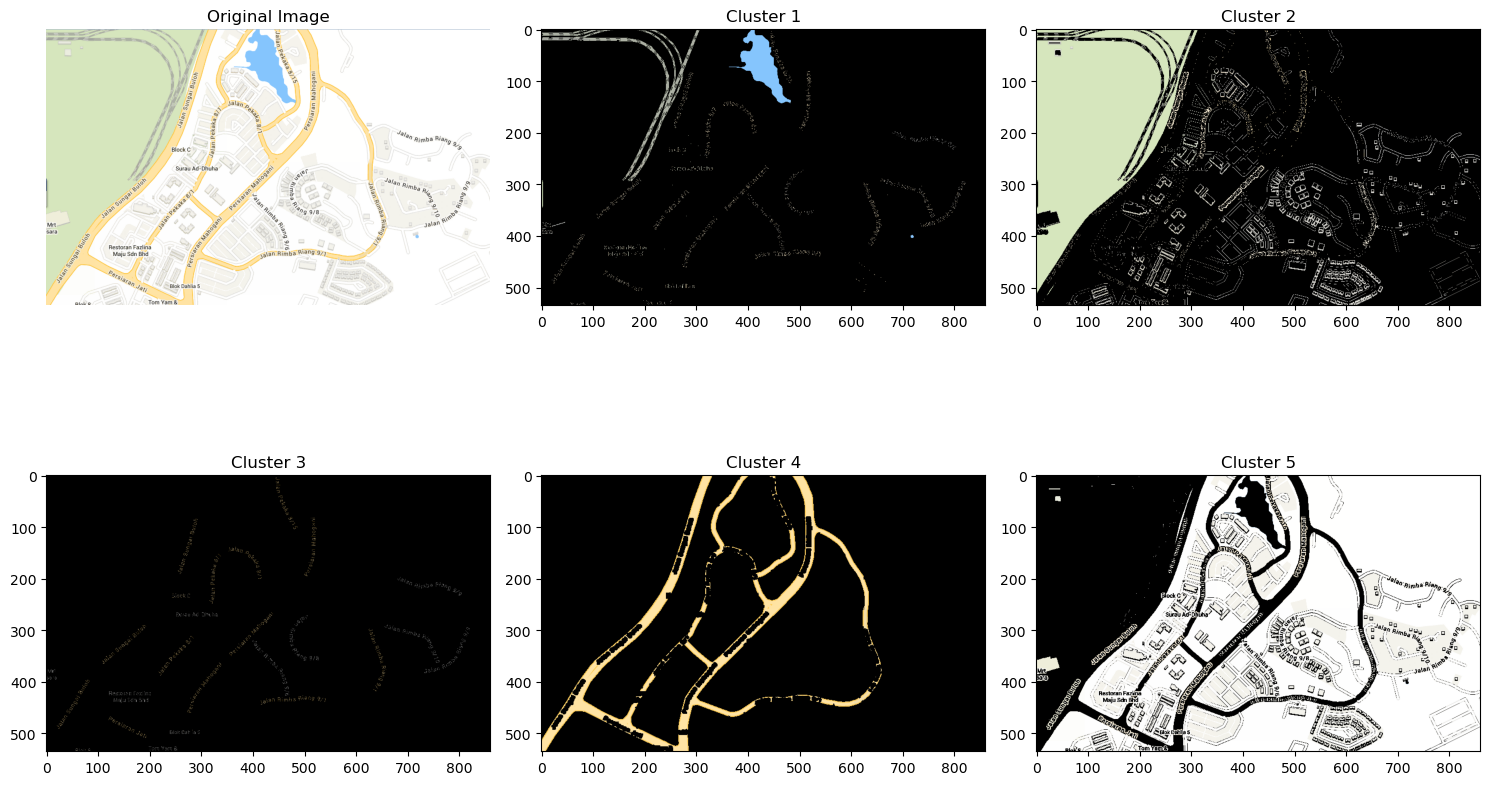

In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('map.png')

# Reshape the image to a 2D array of pixels
pixels = img.reshape((-1, 3))  # Modify to (-1, 3) if color image

# Convert to float32
pixels = np.float32(pixels)

# Define the criteria and flags for k-means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
k = 5  #complete this
flags = cv2.KMEANS_RANDOM_CENTERS

# Apply k-means clustering
ret, label, center = cv2.kmeans(pixels, k, None, criteria, 20, flags)

# Convert the center values back to uint8
center = np.uint8(center)

# Separate pixels based on their labels (clusters)
segmented_imgs = [np.zeros_like(img) for _ in range(k)]

for i in range(k):
    cluster_mask = (label == i).reshape(img.shape[:2])
    segmented_imgs[i][cluster_mask] = img[cluster_mask]

# Display the original image and segmented images
plt.figure(figsize=(15, 10))  # Increase the figure size

plt.subplot(2, 3, 1)  # Adjust the subplot layout
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

for i in range(k):
    plt.subplot(2, 3, i + 2)  # Adjust the subplot layout
    plt.imshow(cv2.cvtColor(segmented_imgs[i], cv2.COLOR_BGR2RGB))
    plt.title(f'Cluster {i + 1}')
    plt.axis('on')

plt.tight_layout()  # Automatically adjust subplot spacing
plt.show()

## (11) Object detection using Haar Cascades
Haar Cascade classifiers are an effective way for object detection. This method was proposed by Paul Viola and Michael Jones in their paper Rapid Object Detection using a Boosted Cascade of Simple Features. Haar Cascade is a machine learning-based approach where a lot of positive and negative images are used to train the classifier.

[[72 92 92 92]]


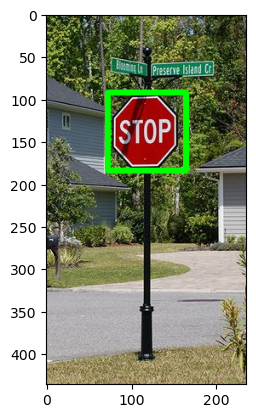

In [38]:
# Opening image
img = cv2.imread("stop_sign_board2.jpg")   #complete this

# OpenCV opens images as BRG but we want it as RGB We'll also need a grayscale version
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Use minSize because for not bothering with extra-small dots that would look like STOP signs
stop_data = cv2.CascadeClassifier('stop_data.xml')  #complete this

found = stop_data.detectMultiScale(img_gray, minSize =(20, 20))  # detectMultiScale() method of the CascadeClassifier is used to detect objects in the grayscale image (img_gray). The method returns a list of rectangles indicating the regions where objects were detected.
print (found)
# Don't do anything if there's no sign
amount_found = len(found)

if amount_found != 0:

    # There may be more than one sign in the image
    for (x, y, width, height) in found:

        # We draw a green rectangle around every recognized sign
        cv2.rectangle(img_rgb, (x, y),                    #complete this
                      (x + height, y + width),
                      (0, 255, 0), 5)

# Creates the environment ofthe picture and shows it
plt.subplot(1, 1, 1)
plt.imshow(img_rgb)
plt.show()

## (12) Face detection using Haar Cascade (image)

https://github.com/kipr/opencv/tree/master/data/haarcascades

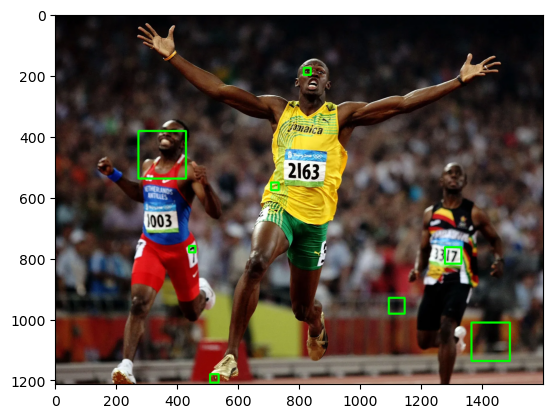

In [37]:
# Opening image
img = cv2.imread("Bolt.jpg")  #complete this

# OpenCV opens images as BRG but we want it as RGB We'll also need a grayscale version
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Use minSize because for not bothering with extra-small dots that would look like STOP signs
stop_data = cv2.CascadeClassifier('haarcascade_eye.xml')  #complete this

found = stop_data.detectMultiScale(img_gray, minSize =(20, 20))


amount_found = len(found)

if amount_found != 0:

    # There may be more than one sign in the image
    for (x, y, width, height) in found:

        # We draw a green rectangle around every recognized sign
        cv2.rectangle(img_rgb, (x, y),                         #complete this
                      (x + height, y + width),
                      (0, 255, 0), 5)

# Creates the environment ofthe picture and shows it
plt.subplot(1, 1, 1)
plt.imshow(img_rgb)
plt.show()